In [125]:
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt

In [126]:
start = input('start: ')
stop = input('stop: ')
hill_c_gpx = start + '_' + 'cross' + '.gpx'
hill_s_gpx = start + '_' + 'stop' + '.gpx'
campus_c_gpx = 'cross' + '_' + stop + '.gpx'
campus_s_gpx = 'stop' + '_' + stop + '.gpx'

start: rieber
stop: powell


In [127]:
class route(object):
    def __init__(self):
        self.db = pd.DataFrame()
        self.df_graph = pd.DataFrame()
        #distance from point to point
        self.pp_distance = pd.DataFrame()
    
    def read_data(self, f):
        self.f = f
        lat = []
        lon = []
        ele = []
#         with open(f, 'r') as f:
#             y = f.read()
#         for lat_v in re.findall(r'lat="([\-\d\.]+)"', y):
#             lat.append(float(lat_v))
#         for long_v in re.findall(r'lon="([\-\d\.]+)"', y):
#             lon.append(float(long_v))
#         for ele_v in re.findall(r'<ele>([\-\d\.]+)</ele>', y):
#             ele.append(float(ele_v))
#         self.db['X'] = lon
#         self.db['Y'] = lat
#         self.db['ele'] = ele
        for a in range (0, 10000):
            if self.read(1) == ' ' and x.read(1) == 'l':
                self.read(4)
                lat.append(float(self.read(9)))
                self.read(7)
                long.append(float(self.read(11)))
                self.read(16)
                ele.append(float(self.read(5)))
    
    def ptdistance(self):
        from math import sin, cos, sqrt, degrees, radians, asin, acos
        #earth radius (mi)
        r = 3958.8
        pp_distance = []
        #inverse haversine
        for a in range (0,self.db.shape[0]-1):
            lat1 = radians(self.db.loc[a]['Y'])
            lat2 = radians(self.db.loc[a+1]['Y'])
            long1 = radians(self.db.loc[a]['X'])
            long2 = radians(self.db.loc[a+1]['X'])
            urad1 = sin((lat2-lat1)/2)**2
            urad2 = cos(lat1) * cos(lat2) * sin((long2-long1)/2)**2
            dis = 2 * r * asin(sqrt(urad1 + urad2))
            pp_distance.append(dis)
        self.pp_distance['d'] = pp_distance
        
    def ttldistance(self):
        dorstance = []
        dorstance.append(self.pp_distance.loc[0]['d'])
        dorstance.append(self.pp_distance.loc[0]['d'] + self.pp_distance.loc[1]['d'])
        for a in range (2,self.db.shape[0]-1):
            dorstance.append(dorstance[a-1] + self.pp_distance.loc[a]['d'])
        self.df_graph['distance'] = dorstance

    def ele(self):
        eleva=[]
        for a in range (0, self.db.shape[0]-1):
            ele1 = self.db.loc[a]['ele']
            ele2 = self.db.loc[a+1]['ele']
            avg = (ele1 + ele2) / 2
            eleva.append(avg)
        self.df_graph['elevation'] = eleva

        
    def graph_prep(self):
        self.ptdistance()
        self.ttldistance()
        self.ele()
        return self.df_graph
    def get_graph(self, npts):
        dist = self.df_graph['distance'].values.reshape(-1,)
        elv = self.df_graph['elevation'].values
        from scipy.interpolate import make_interp_spline, BSpline
        xnew = np.linspace(dist.min(),dist.max(),npts) #300 represents number of points to make between T.min and T.max
        spl = make_interp_spline(dist, elv, k=1) #BSpline object
        power_smooth = spl(xnew)
        plt.plot(xnew,power_smooth, color = 'orange')
        title_name = re.search(r'([\w_]*)\.', self.f).group()
        plt.title(title_name)
        plt.show()

In [131]:
hill_c = route()
# hill_c.read_data(hill_c_gpx)
# df_hill_c = hill_c.graph_prep()
# hill_c.get_graph(20)
hill_c.read_data(hill_c_gpx)

AttributeError: 'route' object has no attribute 'read'

In [90]:
campus_c = route()
campus_c.read_data(campus_c_gpx)
df_campus_c = campus_c.graph_prep()
campus_c.get_graph(20)
campus_c

ValueError: Length of values does not match length of index

In [85]:
test = route()
test.read_data('cross_powell.gpx')
df_test = test.graph_prep()
print(df_test)

ValueError: Length of values does not match length of index

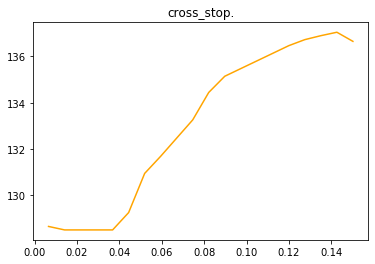

In [8]:
d1 = boelter_cross.db

In [9]:
d2 = cross_sproul.db

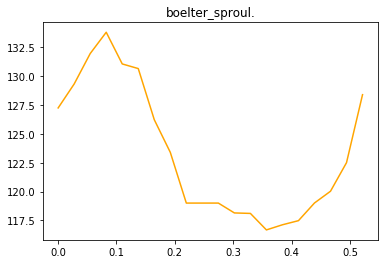

In [10]:
d1.append(d2)
d1.reset_index(inplace = True, drop = True)
try:
    d1 = d1.drop(['level_0','index'], axis = 1)
except:
    pass
boelter_sproul = route()
boelter_sproul.f = 'boelter_sproul.gpx'
boelter_sproul.db = d1
df_boelter_sproul = boelter_sproul.graph_prep()
boelter_sproul.get_graph(20)